In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
df = pd.read_csv("/content/tash-pt.csv")
df

,id_twitter,sentiment,text
0,1067856049821155334,1,@tchaugip @n00bona História vence técnica faci...
1,1070902848957964288,1,@camandis aa obrigado perfeito o seu timing ti...
2,1073158858925838336,0,moldura artística favorita entre filistinos al...
3,1073220881344856064,0,Minha cama tá no localizada no meio nesse mome...
4,1073347140334833664,0,@eueduramos o mundo so vai mudar quando as pes...
...,...,...,...
2782,1068599890761129985,-1,@PastorMalafaia Concordo com Prof Olavo de Car...
2783,1071376463230840833,-1,@ClaudiaLeitte se o clipe de saudade não for g...
2784,1073978880787181568,1,agr o ar vai ficar ligado 24 por 48
2785,1074925265980145666,0,e eu que no meio de tantos problemas ainda con...


In [67]:
df.isnull().sum()
df = df.dropna()

In [68]:
df = df.drop(columns=['id_twitter'])
df['sentiment'].unique()

array([ 1,  0, -1])

In [69]:
df['sentiment'] = df['sentiment'].apply(lambda x: int(x))

In [72]:
tweet = df['text']
sentiment = np.asarray(df['sentiment'])

In [73]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(2787, 12712)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, sentiment, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.55      0.35      0.43       272
           0       0.41      0.63      0.50       301
           1       0.49      0.37      0.42       264

    accuracy                           0.46       837
   macro avg       0.48      0.45      0.45       837
weighted avg       0.48      0.46      0.45       837



In [75]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    return lista

In [76]:
#pré-processamento dos textos
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    return vocab

def Tokenize(f):  

    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    stop_words = set(stopwords.words('portuguese'))
    new_word = [word for word in f if not word in stop_words]
    return ' '.join(new_word)

def remove_user(frase):
    return re.sub('@\w+','',frase)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [78]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<1950x11553 sparse matrix of type '<class 'numpy.float64'>'
	with 24075 stored elements in Compressed Sparse Row format>

In [79]:
X_test

<837x11553 sparse matrix of type '<class 'numpy.float64'>'
	with 10226 stored elements in Compressed Sparse Row format>

In [80]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [81]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
61/61 [==============================] - 1s 11ms/step - loss: 1.0992 - accuracy: 0.3110 - val_loss: 1.0951 - val_accuracy: 0.3692
Epoch 2/25
61/61 [==============================] - 0s 8ms/step - loss: 1.0836 - accuracy: 0.3905 - val_loss: 1.0826 - val_accuracy: 0.4050
Epoch 3/25
61/61 [==============================] - 1s 9ms/step - loss: 0.9793 - accuracy: 0.5645 - val_loss: 1.0885 - val_accuracy: 0.3823
Epoch 4/25
61/61 [==============================] - 1s 8ms/step - loss: 0.6718 - accuracy: 0.7118 - val_loss: 1.2409 - val_accuracy: 0.3883
Epoch 5/25
61/61 [==============================] - 1s 8ms/step - loss: 0.4924 - accuracy: 0.8278 - val_loss: 1.3664 - val_accuracy: 0.4122
Epoch 6/25
61/61 [==============================] - 0s 8ms/step - loss: 0.3153 - accuracy: 0.9160 - val_loss: 1.5248 - val_accuracy: 0.4134
Epoch 7/25
61/61 [==============================] - 0s 8ms/step - loss: 0.1649 - accuracy: 0.9702 - val_loss: 1.6689 - val_accuracy: 0.4122
Epoch 8/25
61/61 [=

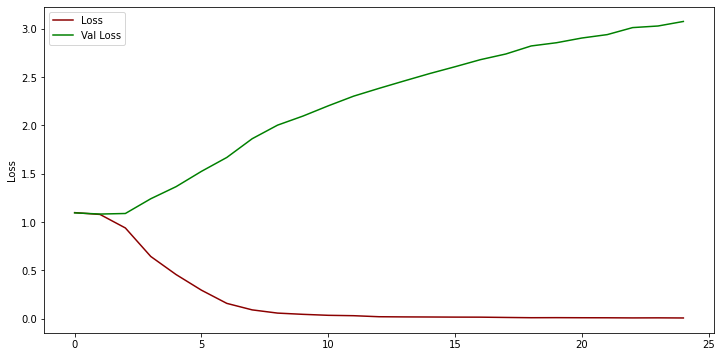

In [82]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

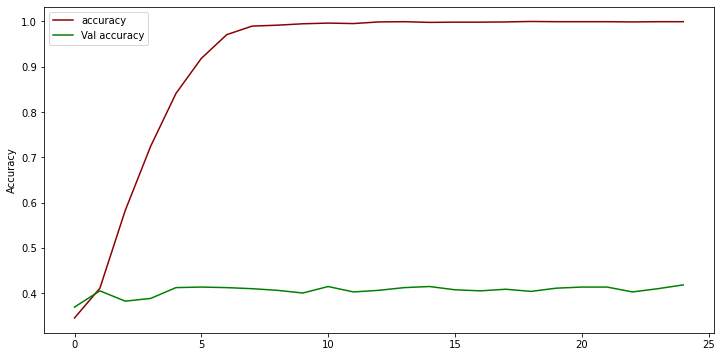

In [83]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [84]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

27/27 [==============================] - 0s 3ms/step - loss: 3.0770 - accuracy: 0.4182


In [85]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df['text'])))

vocab = set_array(df['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


11590

In [86]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [88]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [89]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=20, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/20
16/16 [==============================] - 18s 419ms/step - loss: 1.0988 - accuracy: 0.3302 - val_loss: 1.0963 - val_accuracy: 0.3835
Epoch 2/20
16/16 [==============================] - 3s 192ms/step - loss: 1.0952 - accuracy: 0.3623 - val_loss: 1.0929 - val_accuracy: 0.3835
Epoch 3/20
16/16 [==============================] - 3s 191ms/step - loss: 1.0830 - accuracy: 0.3725 - val_loss: 1.0786 - val_accuracy: 0.3895
Epoch 4/20
16/16 [==============================] - 3s 191ms/step - loss: 0.9691 - accuracy: 0.5787 - val_loss: 1.1798 - val_accuracy: 0.4086
Epoch 5/20
16/16 [==============================] - 3s 191ms/step - loss: 0.7006 - accuracy: 0.7565 - val_loss: 1.3540 - val_accuracy: 0.4050
Epoch 6/20
16/16 [==============================] - 3s 190ms/step - loss: 0.5496 - accuracy: 0.8406 - val_loss: 1.4750 - val_accuracy: 0.3955
Epoch 7/20
16/16 [==============================] - 3s 190ms/step - loss: 0.4520 - accuracy: 0.8715 - val_loss: 1.5555 - val_accuracy: 0.4122
Epoch

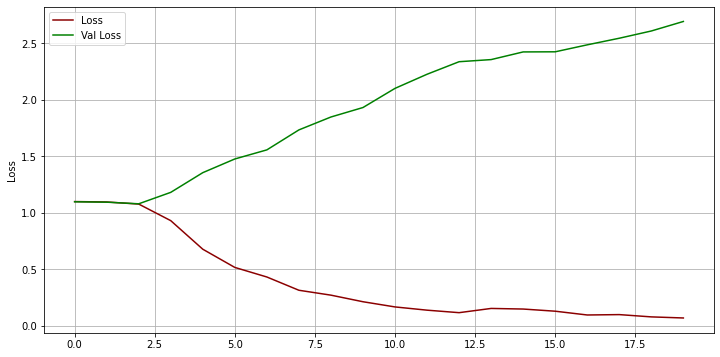

In [90]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

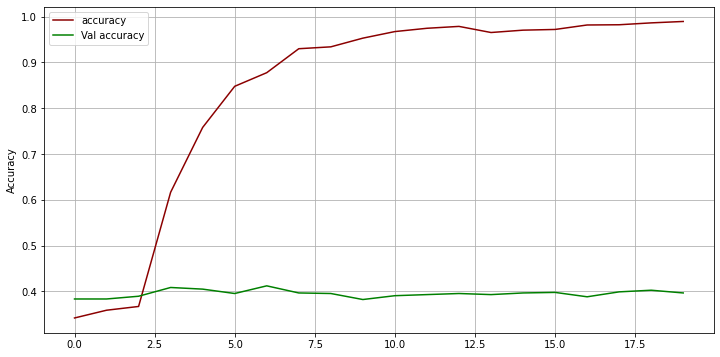

In [91]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [92]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

27/27 [==============================] - 1s 26ms/step - loss: 2.6911 - accuracy: 0.3967
